In [40]:
# dipendenze
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer #per applicare le trasformazioni alle colonne
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler #per normalizzare i dati
from sklearn.preprocessing import LabelEncoder #per trasformare le variabili categoriche in numeriche

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold

In [41]:
CSV = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/refs/heads/main/datasets/breast_cancer.csv"

df = pd.read_csv(CSV, index_col=0)

In [42]:
df.isna().sum()

diagnosis                  0
radius mean                0
texture mean               0
perimeter mean             0
area mean                  0
smoothness mean            0
compactness mean           0
concavity mean             0
concave points mean        0
symmetry mean              0
fractal dimension mean     0
radius se                  0
texture se                 0
perimeter mean.1           0
area se                    0
smoothness se              0
compactness se             0
concavity se               0
concave points se          0
symmetry se                0
fractal dimension se       0
radius worst               0
texture worst              0
perimeter worst            0
area worst                 0
smoothness worstse         0
compactness worst          0
concavity worst            0
concave points worst       0
symmetry worst             0
fractal dimension worst    0
dtype: int64

In [43]:
for col in df.columns:
    print(df[col].dtype)

object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("diagnosis", axis=1), df["diagnosis"], test_size=0.2)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [45]:
numerical_columns = X_train.select_dtypes(include=[np.number]).columns
categorical_columns = df["diagnosis"]

In [46]:
features_preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numerical_columns)
    ],
    remainder="passthrough"
)

X_train = features_preprocessor.fit_transform(X_train)
X_test = features_preprocessor.transform(X_test)

In [47]:
target_preprocessor = LabelEncoder()

y_train = target_preprocessor.fit_transform(y_train.values.reshape(-1,1))
y_test = target_preprocessor.transform(y_test.values.reshape(-1,1))

c:\Repositories\proai\course3-ml-basics\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Repositories\proai\course3-ml-basics\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.98      0.99        43

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



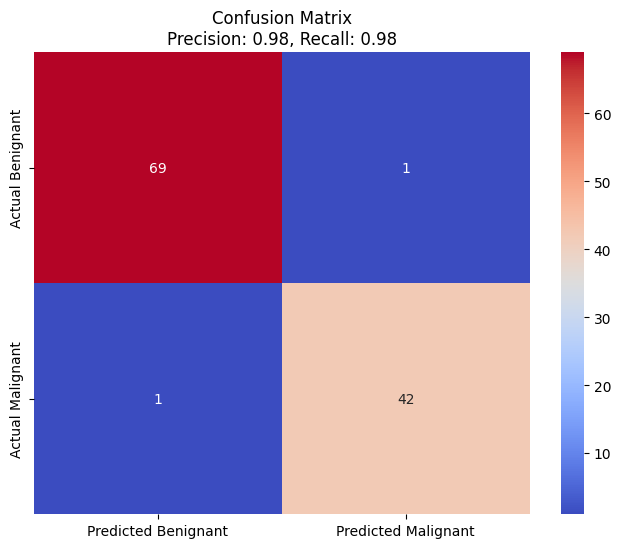

In [51]:
from sklearn.metrics import precision_score, recall_score

# Calcolo precision e recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Creazione della heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')

# Aggiunta delle etichette delle classi
ax.set_xticklabels(['Predicted Benignant', 'Predicted Malignant'])
ax.set_yticklabels(['Actual Benignant', 'Actual Malignant'])

# Aggiunta di precision e recall in alto
plt.title(f'Confusion Matrix\nPrecision: {precision:.2f}, Recall: {recall:.2f}')
plt.show()

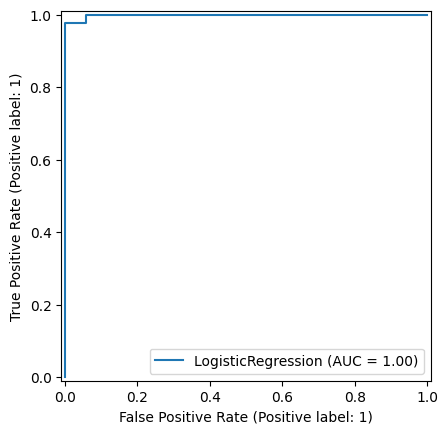

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)

In [53]:
# custom predictions

CSV = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/refs/heads/main/datasets/breast_cancer_pred.csv"

df_pred = pd.read_csv(CSV, index_col=0)

In [54]:
df_pred_array = features_preprocessor.transform(df_pred)

In [58]:
y_pred = model.predict(df_pred_array)

y_pred = np.where(y_pred>0.25, 1, 0)

In [59]:
y_pred_proba = model.predict_proba(df_pred_array)

In [60]:
df_pred_result = pd.DataFrame(
    {
    "Diagnosis": y_pred,
    "Probability": y_pred_proba.max(axis=1)
    },
    index=df_pred.index
)